In [1]:
import pandas as pd
from i_01_insights_functions_raw_data import check_general_info, check_duplicates, check_null_values, print_function_over_array, plot_histogram, plot_bar_categorical

## RAW DATA EDA

In [2]:
df_contract = pd.read_csv('../data/input/contract.csv')
df_internet = pd.read_csv('../data/input/internet.csv')
df_personal = pd.read_csv('../data/input/personal.csv')
df_phone = pd.read_csv('../data/input/phone.csv')

In [3]:
dfs = [df_contract, df_internet, df_personal, df_phone]
dfs_names = ['Contract', 'Internet', 'Personal', 'Phone']

In [4]:
print_function_over_array(dfs_names, dfs, check_general_info)


---Contract---

--INFO--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

--HEAD--
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   

In [5]:
print_function_over_array(dfs_names, dfs, check_duplicates)


---Contract---

Duplicates: 0

---Internet---

Duplicates: 0

---Personal---

Duplicates: 0

---Phone---

Duplicates: 0


In [6]:
print_function_over_array(dfs_names, dfs, check_null_values)


---Contract---

Null values: 
          customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

---Internet---

Null values: 
          customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

---Personal---

Null values: 
          customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

---Phone---

Null values: 
          customerID       0
MultipleLines    0
dtype: int64


Observations:
- The contract dataset contains information about the start of the service contract, the type of contract, and the charges incurred for using the service.

- The internet dataset contains information about users who have paid for internet services and their sub-services, such as technical support, TV and movie streaming, and online security.

- The personal dataset includes information specific to the customer, such as gender, whether they have a partner or dependents, and whether they are a senior citizen.

- The phone dataset only contains information about whether the customer has multiple lines.

- None of the datasets contain missing (null) values.

- Some variables—such as dates, boolean values, and Total charges—are not in their correct data types (e.g., datetime or float).

- The total number of users is 7,043, including those who subscribe to TV services and those who subscribe to internet services.

- The customerID column represents the unique identification number for each user.

### NUMERICAL VARIABLES

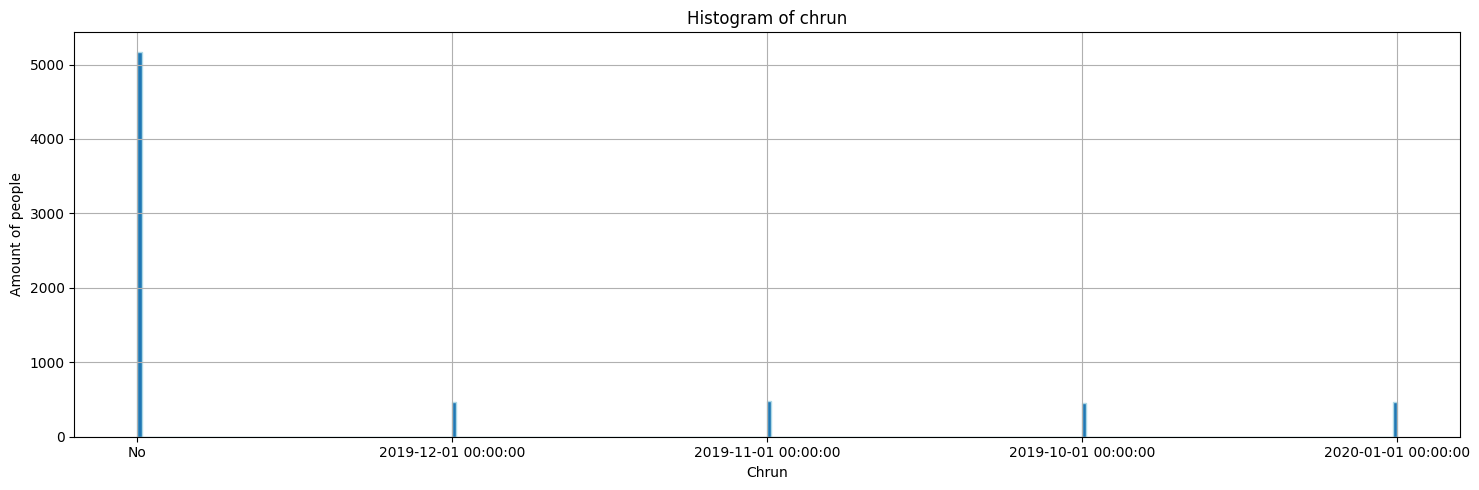

In [7]:
plot_histogram(df_contract, 'EndDate', 'Histogram of chrun', 'Chrun', 'Amount of people')

In [8]:
df_contract_c = df_contract.copy()
df_contract_c['TotalCharges'] = df_contract_c['TotalCharges'].replace(' ', 0).astype(float).sort_values(ascending=True) 

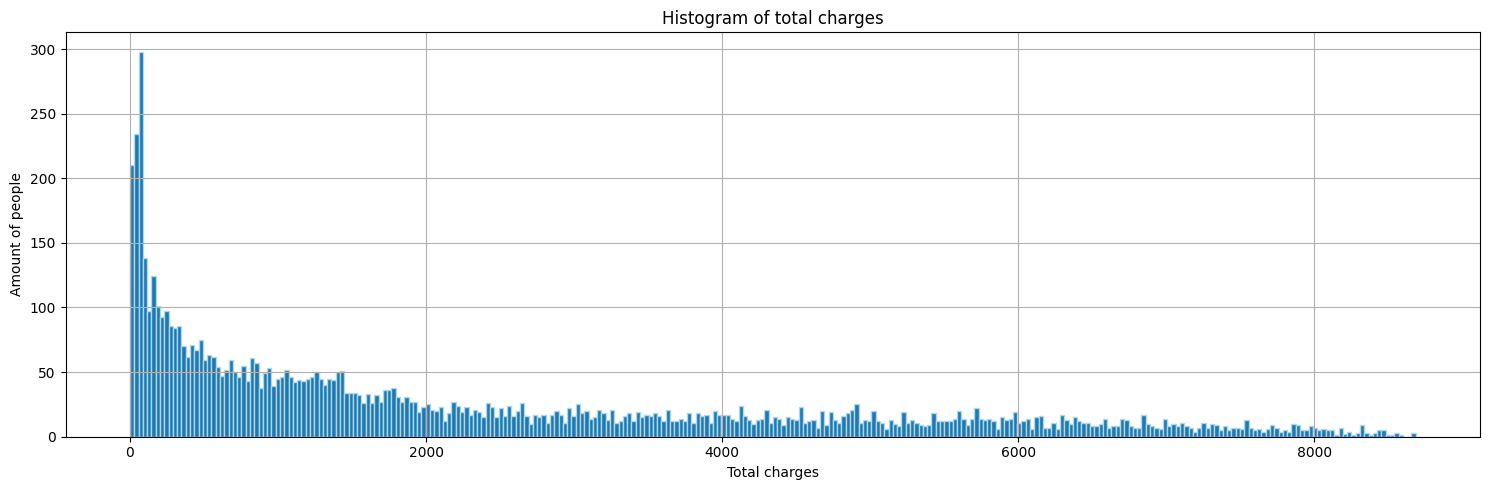

In [9]:
plot_histogram(df_contract_c, 'TotalCharges', 'Histogram of total charges', 'Total charges', 'Amount of people')

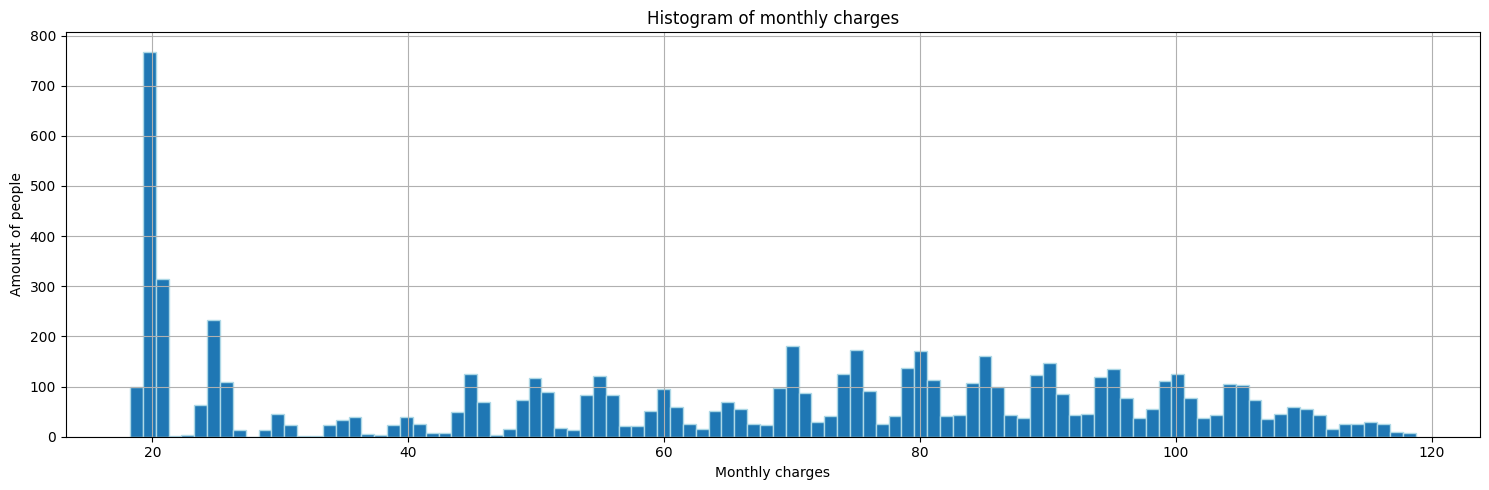

In [10]:
plot_histogram(df_contract_c, 'MonthlyCharges', 'Histogram of monthly charges', 'Monthly charges', 'Amount of people', 100)

### CATEGORICAL VARIABLES

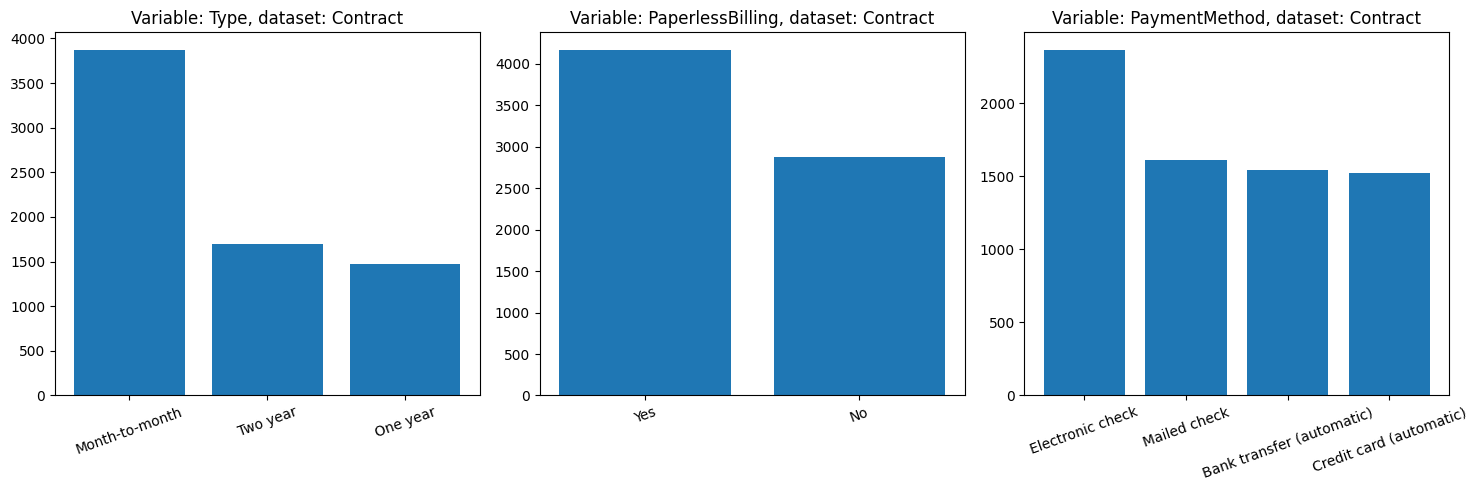

In [12]:
columns_contract_bar = [ 'Type', 'PaperlessBilling', 'PaymentMethod']
plot_bar_categorical(columns_contract_bar, df_contract, 'Contract',1,3)

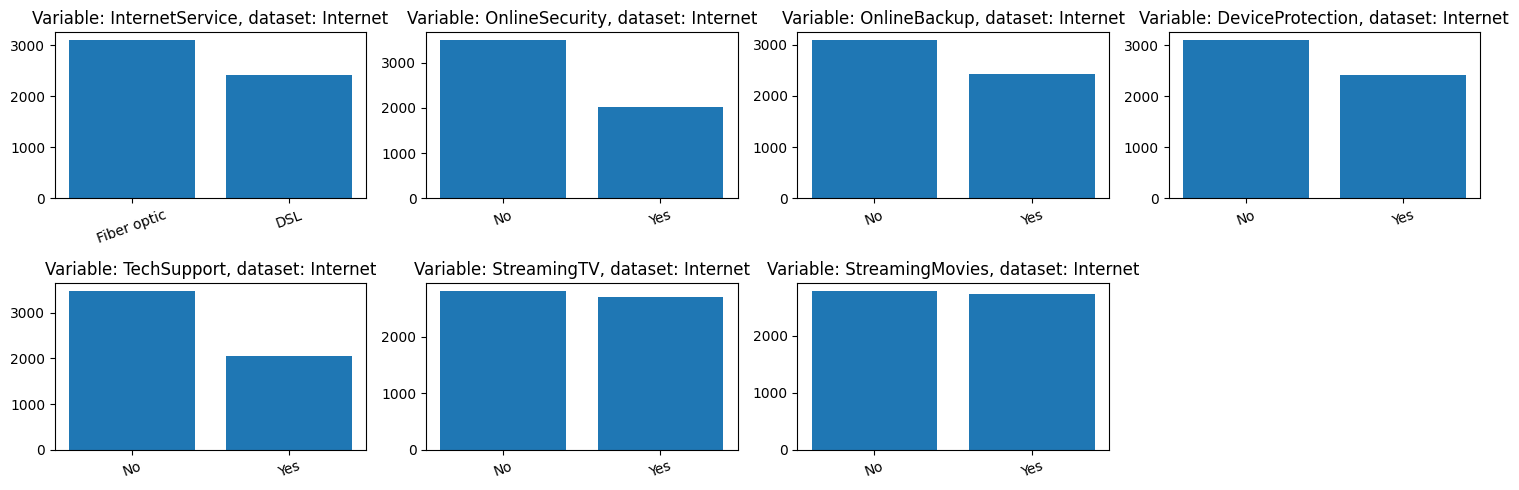

In [13]:
columns_internet_bar = ['InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
plot_bar_categorical(columns_internet_bar, df_internet, 'Internet', 2, 4)

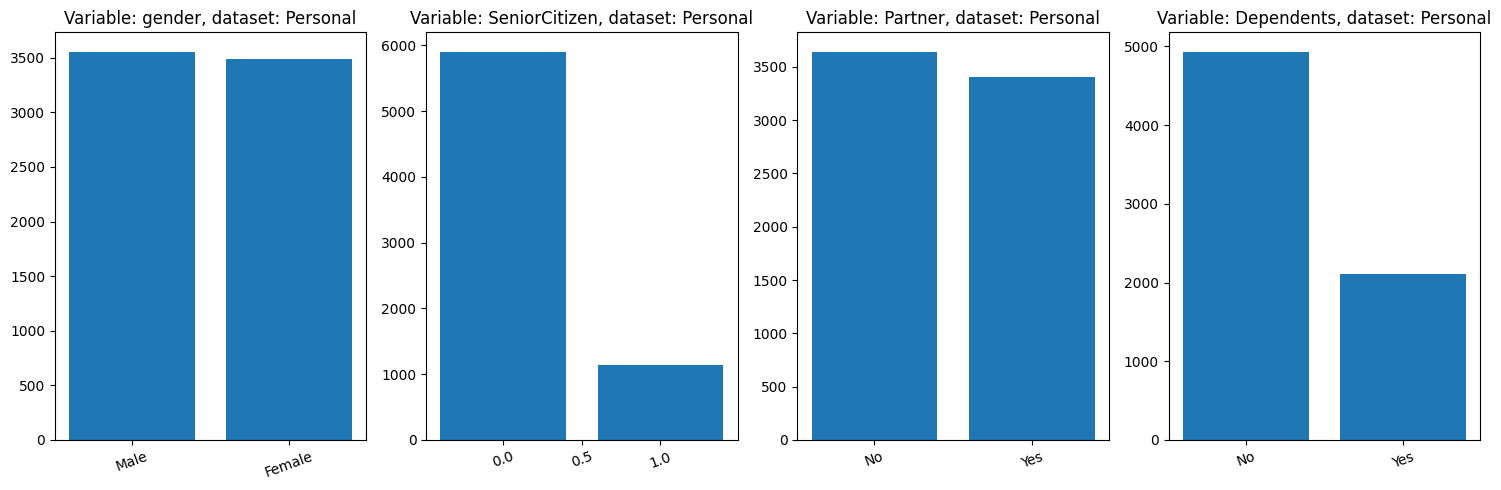

In [14]:
columns_personal_bar = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plot_bar_categorical(columns_personal_bar, df_personal, 'Personal', 1, 4)

Observations:

- The target variable, EndDate, is imbalanced.

- Most variables are categorical.

- The only numerical variables are the date and total payment costs.

- There are only four dates related to customer churn.

- A large number of customers pay around $20, while the rest are mostly distributed around $80.

- There is a strong preference for month-to-month payment, not receiving a paper bill, and making payments via electronic check.

- Variables like streamingTV and streamingMovies are balanced, with almost the same number of customers using and not using the service—among those who use internet services.

- There is an equal number of male and female customers. Most customers are not senior citizens.

- Not all customers subscribe to internet services, and not all subscribe to phone services.